# Demo: Logistic Regression
* source: https://github.com/Tebs-Lab/data-science-three-day-workshop/blob/main/02-linear-logistic-regression/03-logistic-regression.ipynb

## First, let's look at a sigmoid function...

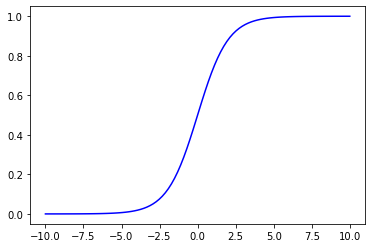

In [1]:
import matplotlib.pyplot as plt
import numpy as np
 

# np.exp is Euler's constant, the base of the natural logarithm 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b');

## Where are the coefficients?

* In linear regression we had a familiar function of a line with the formula:

    $y = mx + b$
<br>
* ...if we had many features, we'd have a unique $m$ for each feature
* With logistic regression we still have that same effect, where each feature has its own coefficent and we have an intercept as well–but, they all now appear as part of the exponent on the bottom of the division

    $y = \frac{1}{(1 + e^-(b + m_1x_1 + m_2x_2 + ... + m_nx_n))}$

* And, instead of $y$ we really predict something we intepret as the probability that the datapoint is a 1
* Often we express this in the equation using $p$ instead of $y$

    $p = \frac{1}{(1 + e^-(b_0 + b_1x_1 + b_2x_2 + ... + b_px_p))}$

## How do these impact the function shape?

In [2]:
def sigmoid_two(x, m, b):
    return 1 / (1 + np.exp(-m*x + b))

In [3]:
# create 100 linearly-spaced points from -10 to +10
r = np.linspace(-10, 10, 100)

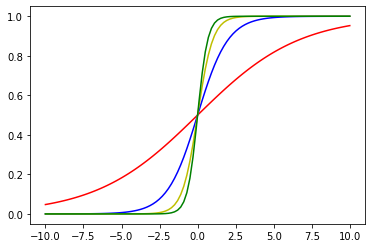

In [4]:
# The coefficient modifies the steepness of the curve
plt.plot(r, sigmoid_two(r, .3, 0), 'r')
plt.plot(r, sigmoid_two(r, 1, 0), 'b')
plt.plot(r, sigmoid_two(r, 2, 0), 'y')
plt.plot(r, sigmoid_two(r, 3, 0), 'g')
plt.show()

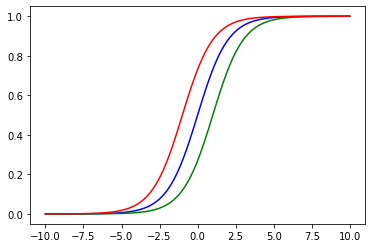

In [5]:
# The intercept modifies the "balancing point" of the curve
# by shifting it left and right
plt.plot(r, sigmoid_two(r, 1, 0), 'b')
plt.plot(r, sigmoid_two(r, 1, 1), 'g')
plt.plot(r, sigmoid_two(r, 1, -1), 'r');

## What about the data?

* Since the data is all labeled either 0 or 1 we end up with a binary classifier

### Lets make some linear data again...

* This time let's give the data labels of 0 or 1 based on their magnitude
  * This simple relationship is ideal for logistic regression, but you'll find it works well even with less clear boundaries...

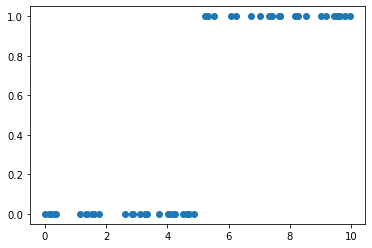

In [6]:
import numpy as np

rng = np.random.RandomState(12)
x = 10 * rng.rand(50) 
y = x > 5
plt.scatter(x, y);

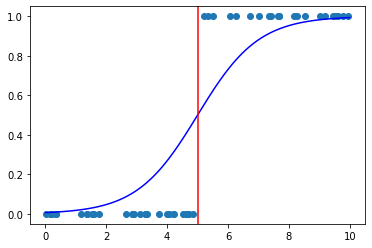

In [7]:
# And with a manually chosen sigmoid overlayed...
r = np.linspace(0, 10, 100)
plt.scatter(x, y);
plt.plot(r, sigmoid_two(r, 1, 5), 'b')
plt.axvline(x=5, color='r');

## Notes

The red line denotes the "decision boundary" which occurs at the inflection point on the sigmoid function: anything to the right of that line gets classified as a __`1`__ whatever that means in our dataset, to the left gets classified as a __`0`__. The actual __`y`__ position along the sigmoid represents our confidence in that prediction—the higher up and further right the more likely we think this datapoint is a __`1`__, and the further down/left the more likely we think it's a __`0`__ 

## Let's actually fit a model and see what it comes up with...

In [8]:
from sklearn.linear_model import LogisticRegression

# Once again, transform our vector...
column_x = x[:, np.newaxis]

model = LogisticRegression()
model.fit(column_x, y)

print(model.coef_, model.intercept_)

[[2.00124219]] [-10.48853498]


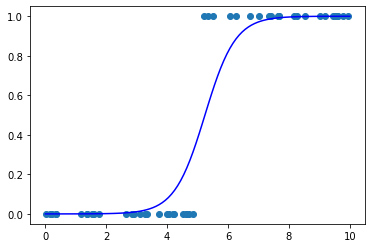

In [9]:
r = np.linspace(0, 10, 100)
plt.scatter(x, y);
plt.plot(r, sigmoid_two(r, model.coef_[0][0], -model.intercept_[0]), 'b')
plt.show()

## Multiple Classes vs. Binary Classification

* There are two common ways to perform multi-class classification with logistic regression
  * The one we'll consider is a strategy called "One-vs-All" and it's a simple extension of the basic idea–Create a unique sigmoid for every class represented in the dataset

* e.g., if we have 3 classes (cat, dog, and frog) we'll create and fit three sigmoids such that we have:
  * One classifying "cat or not cat"
  * One classifying "dog or not dog"
  * One classifying "frog or not frog"
* When fitting the data, all non-cat datapoints will be treated as not cats when fitting the first function, etc.
* To make a prediction we run our data through all three functions and the one with the highest probability is chosen 